<a href="https://www.kaggle.com/code/vidhikishorwaghela/ai-ml-cartoonifier?scriptVersionId=172874356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# 🎨 Cartoonify: Turning Photos into Fun Art! 🎉

In this guide, we'll walk you through the entire process of transforming real photos into cartoonified images. Along the way, we'll explain each step and the technology stack involved in the process. Let's dive in!

## Tech Stack

- **OpenCV**: We use OpenCV for image processing tasks such as loading the image, converting color formats, and applying filters.
- **Matplotlib**: Matplotlib helps visualize the images and results of each step in the transformation process.
- **NumPy**: NumPy is used for efficient numerical computations throughout the process.
- **TensorFlow/Keras**: This stack could be useful for potential advanced image processing applications.
- **Skimage**: Provides image manipulation functions that may be used in more advanced versions of the process.

## Steps Overview

Here's what we'll do in this process:

1. **🖼️ Load the Image**
    - **Tech**: OpenCV
    - **What happens**: Load the input image using OpenCV and convert it from BGR to RGB format. Display the real image to see where the journey begins!

2. **✨ Apply Edge Detection**
    - **Tech**: OpenCV
    - **What happens**: Convert the image to grayscale and apply a median blur to reduce noise. Use the Canny edge detection algorithm to find and visualize the edges in the image.

3. **🎨 Apply Bilateral Filter**
    - **Tech**: OpenCV
    - **What happens**: Apply a bilateral filter to smooth the image while preserving the edges. This filter helps to create a soft, artistic look.

4. **🖌️ Cartoonify the Image**
    - **Tech**: OpenCV
    - **What happens**: Invert the edges to create a mask, convert it to 3 channels, and combine it with the filtered image using bitwise operations. This creates the cartoonified version.

5. **🆚 Display and Compare**
    - **Tech**: Matplotlib
    - **What happens**: Display the real and cartoonified images side by side for comparison. Observe the magical transformation from reality to cartoon!

## Backend and Process Details

- **Image Loading**: The `load_image` function uses OpenCV to load the image and convert it to RGB format for consistency in further processing.

- **Edge Detection**: The `apply_edge_detection` function converts the image to grayscale, applies a median blur, and uses Canny edge detection to find edges.

- **Bilateral Filter**: The `apply_bilateral_filter` function uses a bilateral filter to smooth the image while preserving the edges for a soft, cartoonish appearance.

- **Cartoonify Image**: The `cartoonify_image` function combines the filtered image with the inverted edges mask using bitwise operations. This creates the final cartoonified image.

- **Displaying Images**: The `show_comparison` function uses Matplotlib to display the real and cartoonified images side by side for comparison.

Now you have a complete understanding of the tech stack and the process involved in converting real photos into cartoonified art. Enjoy your artistic journey! 🎉

In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, color


2024-04-19 14:22:28.915157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 14:22:28.915275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 14:22:29.073019: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


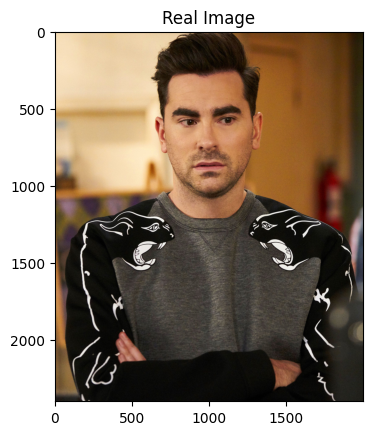

In [2]:
def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert the image from BGR (OpenCV format) to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image_rgb

# Example usage:
real_image_path = '/kaggle/input/schitts-creek/david.jpeg'
real_image = load_image(real_image_path)
plt.imshow(real_image)
plt.title("Real Image")
plt.show()


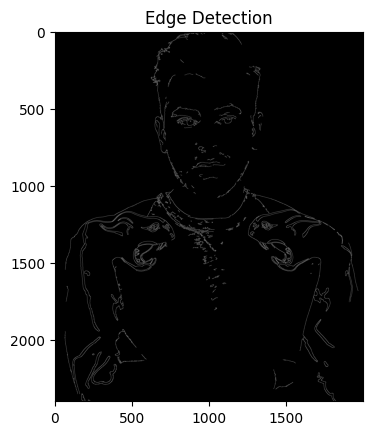

In [3]:
def apply_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply a median blur to reduce noise
    blurred_image = cv2.medianBlur(gray_image, 5)
    
    # Use the Canny edge detection algorithm
    # Adjust the thresholds to control the edge detection sensitivity
    edges = cv2.Canny(blurred_image, 50, 150)
    
    return edges

# Apply edge detection to the real image
edges = apply_edge_detection(real_image)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.show()


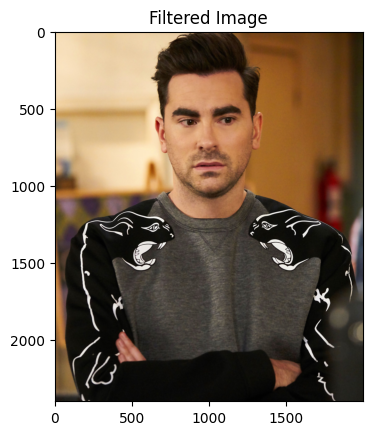

In [4]:
def apply_bilateral_filter(image):
    # Apply a bilateral filter to smooth the image while preserving edges
    # Adjust the parameters d, sigmaColor, and sigmaSpace for different effects
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    
    return filtered_image

# Apply bilateral filter to the real image
filtered_image = apply_bilateral_filter(real_image)
plt.imshow(filtered_image)
plt.title("Filtered Image")
plt.show()


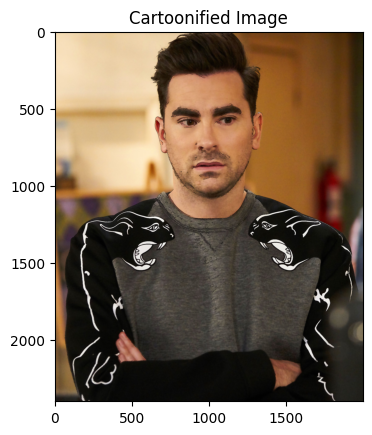

In [5]:
def cartoonify_image(image, edges, filtered_image):
    # Invert the edges to create a mask
    edges_inv = cv2.bitwise_not(edges)
    
    # Convert the edges mask to 3 channels
    edges_inv_colored = cv2.cvtColor(edges_inv, cv2.COLOR_GRAY2RGB)
    
    # Combine the filtered image and the edges mask using bitwise_and
    cartoon_image = cv2.bitwise_and(filtered_image, edges_inv_colored)
    
    return cartoon_image

# Cartoonify the image
cartoon_image = cartoonify_image(real_image, edges, filtered_image)
plt.imshow(cartoon_image)
plt.title("Cartoonified Image")
plt.show()


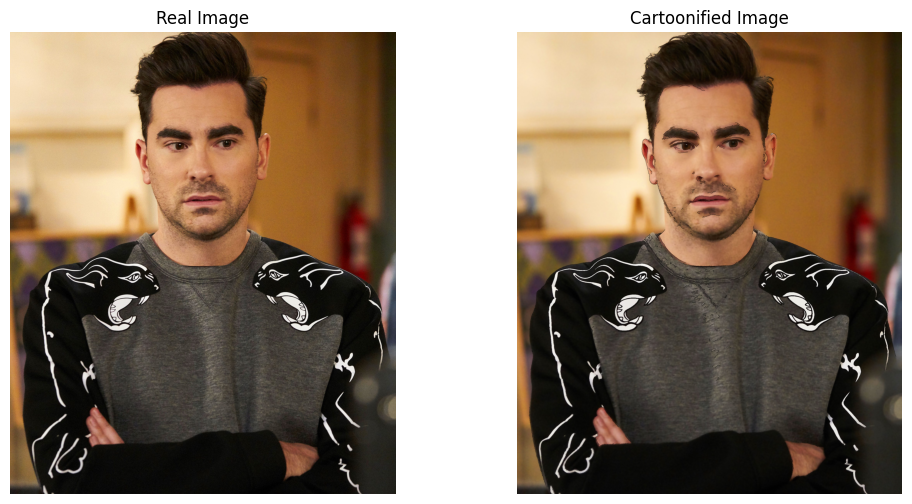

In [6]:
# Display real and cartoonified images side by side
def show_comparison(real_image, cartoon_image):
    # Create a figure
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the real image
    axs[0].imshow(real_image)
    axs[0].set_title("Real Image")
    axs[0].axis('off')
    
    # Display the cartoonified image
    axs[1].imshow(cartoon_image)
    axs[1].set_title("Cartoonified Image")
    axs[1].axis('off')
    
    # Show the figure
    plt.show()

# Show the comparison
show_comparison(real_image, cartoon_image)


In [7]:
# Save images to a specified directory
output_dir = '/kaggle/working/'  # Adjust the path accordingly

cv2.imwrite(output_dir + 'real_image.jpg', cv2.cvtColor(real_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(output_dir + 'edges.jpg', edges)
cv2.imwrite(output_dir + 'filtered_image.jpg', cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(output_dir + 'cartoon_image.jpg', cv2.cvtColor(cartoon_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(output_dir + 'comparison.jpg', cv2.cvtColor(cartoon_image, cv2.COLOR_RGB2BGR))


True

# MORE ENHANCED VERSION:

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


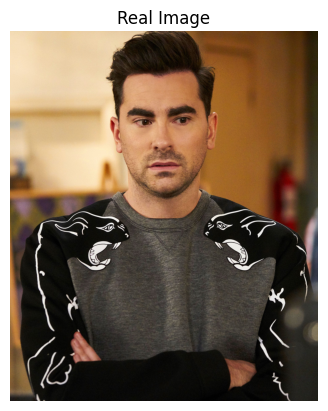

In [9]:
def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        raise ValueError("Image could not be loaded. Please check the path.")
    
    # Convert the image from BGR (OpenCV format) to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image_rgb

# Define the path to the real image
real_image_path = '/kaggle/input/schitts-creek/david.jpeg'  # Replace with the path to your real image

# Load the real image
real_image = load_image(real_image_path)

# Visualize the loaded image
plt.imshow(real_image)
plt.title("Real Image")
plt.axis('off')
plt.show()


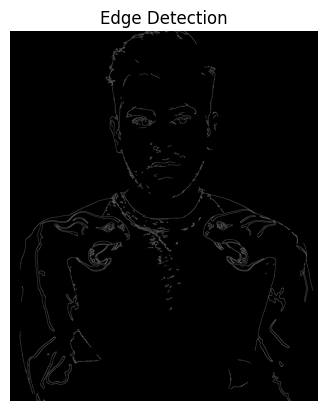

In [10]:
def apply_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply a median blur to reduce noise
    blurred_image = cv2.medianBlur(gray_image, 5)
    
    # Use the Canny edge detection algorithm
    edges = cv2.Canny(blurred_image, 50, 150)
    
    # Visualize the edges
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis('off')
    plt.show()
    
    return edges

# Apply edge detection and visualize
edges = apply_edge_detection(real_image)


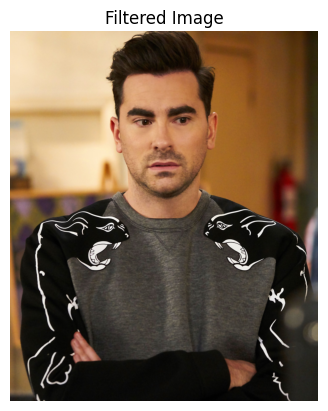

In [11]:
def apply_bilateral_filter(image):
    # Apply a bilateral filter to smooth the image while preserving edges
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Visualize the filtered image
    plt.imshow(filtered_image)
    plt.title("Filtered Image")
    plt.axis('off')
    plt.show()
    
    return filtered_image

# Apply bilateral filter and visualize
filtered_image = apply_bilateral_filter(real_image)


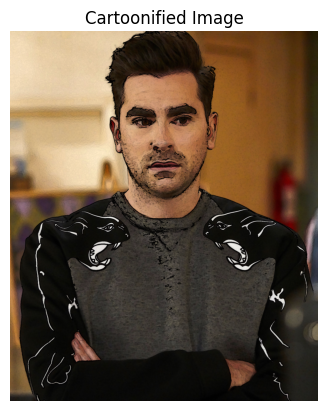

In [12]:
def apply_stylization(image):
    # Apply OpenCV's stylization filter to give a cartoon-like effect
    stylized_image = cv2.stylization(image, sigma_s=0.3, sigma_r=0.3)
    return stylized_image

def cartoonify_image(image, edges, filtered_image):
    # Invert the edges to create a mask
    edges_inv = cv2.bitwise_not(edges)
    
    # Convert the inverted edges to 3 channels
    edges_inv_colored = cv2.cvtColor(edges_inv, cv2.COLOR_GRAY2RGB)
    
    # Combine the filtered image and the inverted edges mask using bitwise_and
    cartoon_image = cv2.bitwise_and(filtered_image, edges_inv_colored)
    
    # Apply stylization to the cartoon image
    cartoon_image = apply_stylization(cartoon_image)
    
    return cartoon_image

# Apply cartoonification to the real image
cartoon_image = cartoonify_image(real_image, edges, filtered_image)

# Visualize the cartoonified image
plt.imshow(cartoon_image)
plt.title("Cartoonified Image")
plt.axis('off')
plt.show()


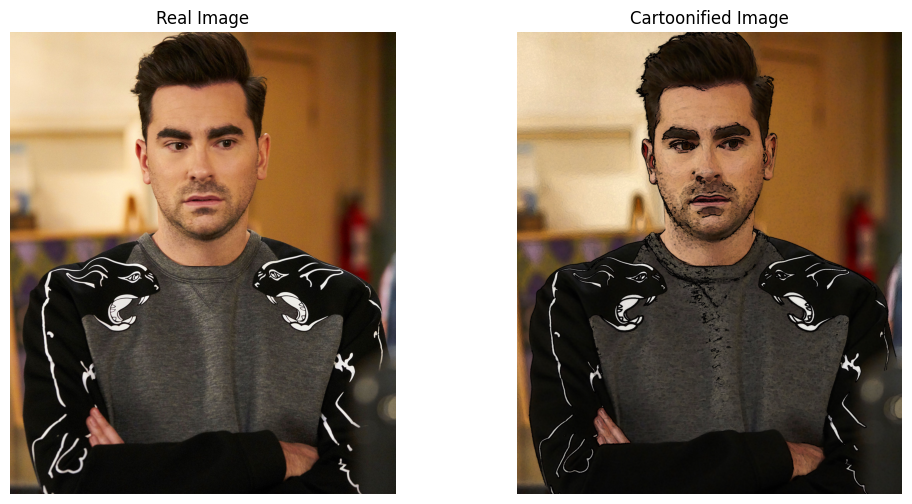

In [13]:
# Display the real image and cartoonified image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the real image
axs[0].imshow(real_image)
axs[0].set_title("Real Image")
axs[0].axis('off')

# Display the cartoonified image
axs[1].imshow(cartoon_image)
axs[1].set_title("Cartoonified Image")
axs[1].axis('off')

# Show the plot
plt.show()